In [1]:
from models.emonet import EmoNet
import torch
import pickle
from skimage import io
import cv2
from torchvision import transforms
from PIL import Image
import numpy as np

In [2]:
device = 'cpu'
n_expression = 8 # 5 or 8
image_size = 256
target_height, target_width = image_size, image_size

In [3]:
state_dict = torch.load(f"models/emonet_{n_expression}.pth", map_location='cpu')
state_dict = {k.replace('module.',''):v for k,v in state_dict.items()}
net = EmoNet(n_expression=n_expression).to(device)
net.eval()

In [4]:
EMOTIONS = ["Neutral", "Happy", "Sad", "Surprise", "Fear", "Disgust", "Anger", "Contempt"]

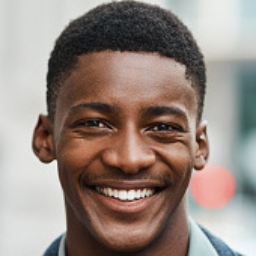

In [5]:
image = io.imread("happy.jpg")
scalingFactor = target_height/image.shape[0] #Image is square
image = cv2.resize(image, (target_width, target_height))
image = np.ascontiguousarray(image)
Image.fromarray(image)

In [6]:
transform_image = transforms.Compose([transforms.ToTensor()])
image = transform_image(image).to(device)

In [7]:
with torch.no_grad():
    out = net(image.unsqueeze(0))
    expr = out["expression"]
    dominant_emotion = EMOTIONS[expr.argmax().item()]
    val, arousal = out["valence"].item(), out["arousal"].item()
dominant_emotion

'Happy'

In [8]:
val, arousal

(-0.12307719886302948, 0.035771846771240234)